In [12]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Analyse par apprentissage non supervisé (clustering)

* [Importation et lecture des données déjà nettoyer au préalable](#a) 
* [Normalisation des données](#b)
* [1/ Classification ascendante hiérarchique représenter à l'aide  d'un dendrogramme](#1)
    * [Représentation de la méthode du score de silhouette](#1-1)
    * [Tableau représentant la moyenne de chaque indicteurs par clusters de la Classification ascendante hiérarchique](#1-2)
* [2/ Algorithme du k-means](#2)
    * [Tableau représentant la moyenne de chaque indicteurs par clusters du k-means](#2-1)
* [3/ Analyse en Composantes Principales ACP](#3)
    * [Cercle des corrélations](#3-1)
    * [Projection des individus](#3-2)

#### Importation et lecture des données déjà nettoyer au préalable<a id='a'></a>

In [3]:
df_final= pd.read_csv('Openclassrooms/Projet 9/data/df_final.csv')


In [4]:
df_final.head()


,Zone,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017
0,Afghanistan,36296.113,5.47,29.0,28.0,534.020133,-3.61,-2.80
1,Afrique du Sud,57009.756,2.93,514.0,1667.0,6723.928582,8.43,-0.28
2,Albanie,2884.169,-0.22,38.0,13.0,4521.752217,14.46,0.38
3,Algérie,41389.189,4.18,2.0,275.0,4134.936055,-1.49,-0.92
4,Allemagne,82658.409,1.06,842.0,1514.0,44670.222282,9.24,0.59


#### Normalisation des données<a id='b'></a>

Nous procédons à la normalisation de nos données, c'est à dire que nous réduisons et centrons celle-ci, afin qu'elles soient à la même échelle de grandeur. Puis nous créons une liste pour nos pays et une autre pour nos indicateurs.

In [6]:
X = df_final.drop('Zone', axis='columns')


In [7]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:2])


[[ 2.71510484e-03  1.24660191e+00 -3.09618628e-01 -2.80950099e-01
  -6.90990189e-01 -8.85432665e-01 -3.00791380e+00]
 [ 1.85658216e-01  1.44232951e-01  2.34140494e+00  4.90630172e-01
  -3.71095215e-01  1.87785244e-01 -2.25938946e-01]]


In [8]:
pays = df_final['Zone'].to_numpy()

indicateurs = df_final.drop(columns='Zone').columns.to_numpy()


### 1/ Classification ascendante hiérarchique représenter à l'aide  d'un dendrogramme<a id='1'></a>

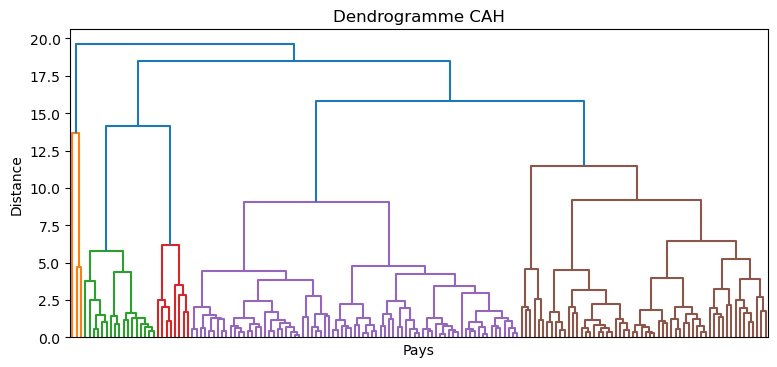

In [10]:
# Exécution du regroupement hiérarchique
Z = linkage(X_scaled, method='ward')

# Tracage du dendogramme
plt.figure(figsize=(9, 4))
dendrogram(Z, no_labels=True, orientation='top')
plt.title('Dendrogramme CAH')
plt.xlabel('Pays')
plt.ylabel('Distance')

plt.show()



#### Représentation de la méthode du score de silhouette<a id='1-1'></a>

On définit ensuite la distance de coupure pour déterminer le nombre de clusters en visualisant notre dendrogramme. Un bon point de coupure semble être aux alentours de 13.

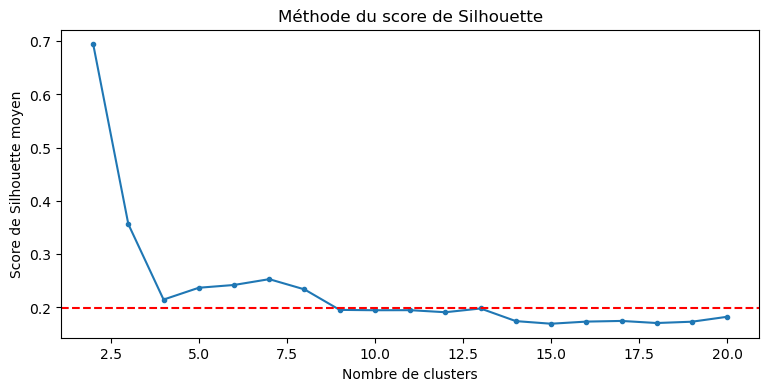

In [13]:
# Initialise les variables
n_clusters_range = range(2, 21)
silhouette_avg_scores = []

# Calcule le score de Silhouette moyen pour chaque valeur du nombre de clusters
for n_clusters in n_clusters_range:
    clustering = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, clustering)
    silhouette_avg_scores.append(silhouette_avg)

# Représentation du diagramme
plt.figure(figsize=(9, 4))
plt.plot(n_clusters_range, silhouette_avg_scores, marker='.')
plt.axhline(y=silhouette_avg_scores[11], linestyle = '--', color='r')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Silhouette moyen')
plt.title('Méthode du score de Silhouette')

plt.show()



La methode silhouette nous permet de déterminer le nombre de clusters a étudier pour trouver des pays potentiellement interessants pour notre analyse. Ici nous choisissons le nombre de 13.

In [15]:
# Initialise le nombre de clusters
nombre_clusters = 13

# Effectue le clustering
clustering = fcluster(Z, t=nombre_clusters, criterion='maxclust')



In [16]:
df_final['cluster_m'] = clustering


In [17]:
# Création de listes des clusters triés dans l'ordre croissant
clusters = np.sort(df_final['cluster_m'].unique())

# Affichage des listes des pays de chaque cluster
for cluster in clusters:
    n_pays = len(
        df_final.loc[df_final['cluster_m'] == cluster, 'Zone'])
    liste_pays = list(
        df_final.loc[df_final['cluster_m'] == cluster, 'Zone'])

    print(f'Cluster {cluster} - {n_pays} Zone')
    print(f'{liste_pays}')

Cluster 1 - 2 Zone
['Brésil', "États-Unis d'Amérique"]
Cluster 2 - 1 Zone
['Inde']
Cluster 3 - 6 Zone
['Chine - RAS de Macao', 'Irlande', 'Islande', 'Luxembourg', 'Norvège', 'Suisse']
Cluster 4 - 11 Zone
['Australie', 'Autriche', 'Bahamas', 'Belgique', 'Canada', 'Danemark', 'Émirats arabes unis', 'Finlande', 'France', 'Nouvelle-Zélande', 'Suède']
Cluster 5 - 4 Zone
['Allemagne', 'Chine - RAS de Hong-Kong', 'Japon', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]
Cluster 6 - 4 Zone
['Afrique du Sud', 'Arabie saoudite', 'Iraq', 'Mexique']
Cluster 7 - 33 Zone
['Albanie', 'Barbade', 'Bosnie-Herzégovine', 'Bulgarie', 'Croatie', 'Cuba', 'Dominique', 'Espagne', 'Estonie', 'Fidji', 'Grèce', 'Grenade', 'Hongrie', 'Italie', 'Lettonie', 'Lituanie', 'Malte', 'Maurice', 'Monténégro', 'Pologne', 'Portugal', 'République de Corée', 'République de Moldova', 'Roumanie', 'Sainte-Lucie', 'Saint-Vincent-et-les Grenadines', 'Samoa', 'Serbie', 'Slovaquie', 'Slovénie', 'Tchéquie', 'Uruguay', 'Viet Nam'

#### Tableau représentant la moyenne de chaque indicteurs par clusters de la Classification ascendante hiérarchique<a id='1-2'></a>

Ce tableau nous permet de choisir plus facilement les clusters qui contiennent les pays les plus interessants pour notre études de marché. Ici, nous avons un interet plus particulier qui se dessin pour les pays des clusters 3 et 5. En effet, ces clusters sont intéressants en raison de leur combinaison de PIB, croissance économique et stabilité. 

In [20]:
clusters_m_statistics = (
    df_final.groupby('cluster_m')[indicateurs].mean()
)

(clusters_m_statistics
 .T.style.background_gradient(axis='columns').format('{:.2f}')
)

cluster_m,1,2,3,4,5,6,7,8,9,10,11,12,13
population en milliers,266459.29,1338676.78,3342.38,16556.22,71048.73,63110.26,12570.99,10815.66,59161.49,14281.25,23304.05,82551.28,101205.91
evolution population 2015-2017,1.48,2.18,2.51,1.56,0.92,3.81,-0.09,2.46,2.80,6.08,4.94,3.27,1.84
Importations Volaille Qté,63.00,0.00,31.33,167.55,899.25,669.50,62.15,25.11,43.00,54.15,21.28,47.67,45.25
Production Volaille Qté,18057.50,3545.00,52.50,525.73,1391.75,1407.00,286.21,287.59,366.83,41.05,55.06,1108.00,1516.12
Valeur PIB USD,34682.47,1937.92,81685.92,46422.01,42476.28,10513.23,14144.49,7463.56,3787.50,3840.65,1806.26,3406.14,4346.43
evolution pib 2015-2017,9.09,19.42,10.17,7.01,5.11,3.42,12.35,5.50,-30.43,-2.22,13.22,-0.23,20.21
Indice de stabilité 2017,-0.09,-0.76,1.26,0.90,0.73,-1.01,0.60,0.01,-1.38,-0.35,-0.70,-1.71,-1.24


In [21]:
clusters_m_statistics = [1, 2]

pays_retenus = set(
    df_final.loc[df_final['cluster_m'].isin([1, 2]), 'Zone']
)

### 2/ Algorithme du k-means<a id='2'></a>

Nous allons utiliser ici l'algorithme des k-means, une autre méthode de clustering.
Le k-means est un algorithme de clustering utilisé pour regrouper un ensemble de données en un nombre prédéfini de clusters K. 

Chaque cluster est représenté par le centroïde, qui est la moyenne des points de données appartenant à ce cluster. L'objectif du k-means est de minimiser la somme des distances carrées entre chaque point de données et le centroïde de son cluster.

Pour déterminer le nombre de cluster, nous avons choisi la methode du coude. 
La méthode du coude consiste à repérer l'endroit à partir duquel l'inertie diminue le plus lentement lorsqu'on parcours le diagramme des éboulis de gauche à droite.

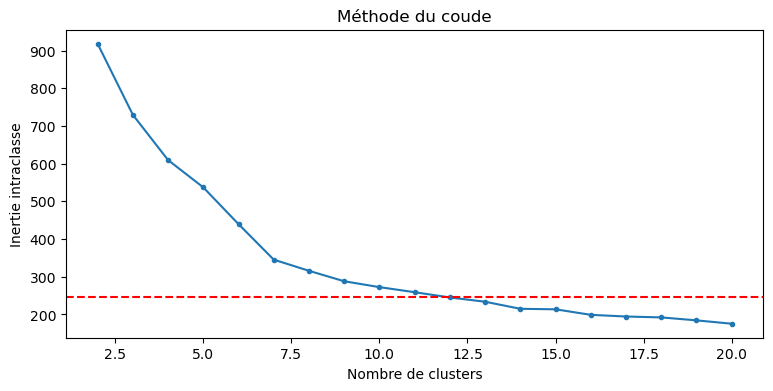

In [24]:
# Initialise les variables
n_clusters_range = range(2, 21)
inertias=[]

# Calcul l'inertie pour chaque valeur du nombre de clusters
for n_clusters in n_clusters_range:
    clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='random',
                      random_state=0)
    clustering = clustering.fit(X_scaled)
    inertias.append(clustering.inertia_)

# Représentation du diagramme
plt.figure(figsize=(9, 4))
plt.plot(n_clusters_range, inertias, marker='.')
plt.axhline(y=inertias[10], linestyle = '--', color='r')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intraclasse')
plt.title('Méthode du coude')

plt.show()


In [25]:
# Initialise le nombre de clusters
n_clusters = 12

# Effectue le clustering
clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='random',
                    random_state=0)
clustering.fit(X_scaled)



KMeans(init='random', n_clusters=12, n_init='auto', random_state=0)

In [26]:
df_final['cluster_kmeans'] = clustering.labels_ + 1


In [27]:
# Crée la liste des clusters triés par ordre croissant
clusters = np.sort(df_final['cluster_kmeans'].unique())

# Liste les pays de chaque cluster et les affiche
for cluster in clusters:
    n_pays = len(
        df_final.loc[df_final['cluster_kmeans'] == cluster, 'Zone'])
    liste_pays = list(
        df_final.loc[df_final['cluster_kmeans'] == cluster, 'Zone'])

    print(f'Cluster {cluster} - {n_pays} pays')
    print(f'{liste_pays}')

#del clusters, cluster, n_pays, liste_pays

Cluster 1 - 22 pays
['Albanie', 'Bosnie-Herzégovine', 'Bulgarie', 'Croatie', 'Cuba', 'Espagne', 'Fédération de Russie', 'Géorgie', 'Grèce', 'Hongrie', 'Italie', 'Lettonie', 'Lituanie', 'Macédoine du Nord', 'Monténégro', 'Pologne', 'République de Corée', 'République de Moldova', 'Roumanie', 'Serbie', 'Ukraine', 'Viet Nam']
Cluster 2 - 26 pays
['Argentine', 'Arménie', 'Bélarus', 'Bolivie (État plurinational de)', 'Colombie', 'El Salvador', 'Équateur', 'Eswatini', 'Guyana', 'Haïti', 'Honduras', 'Indonésie', 'Jamaïque', 'Lesotho', 'Malaisie', 'Maroc', 'Myanmar', 'Nicaragua', 'Paraguay', 'Pérou', 'République dominicaine', 'République populaire démocratique de Corée', 'Sri Lanka', 'Thaïlande', 'Trinité-et-Tobago', 'Zimbabwe']
Cluster 3 - 15 pays
['Australie', 'Autriche', 'Belgique', 'Canada', 'Chine - RAS de Macao', 'Danemark', 'Émirats arabes unis', 'Finlande', 'Irlande', 'Islande', 'Luxembourg', 'Norvège', 'Nouvelle-Zélande', 'Suède', 'Suisse']
Cluster 4 - 4 pays
['Afrique du Sud', 'Arabie

Nous décidons à nouveau de représenter nos clusters dans un tableau, afin de choisir plus facilement ceux qui sont les plus interessants en fonctionne de nos différents indicateurs. Ici, notre tableau est basé sur nos centroïdes (qui sont les moyennes des points de données appartenant aux clusters), et nous décidons de revenir à des valeurs de données non normalisées.

#### Tableau représentant la moyenne de chaque indicteurs par clusters du k means<a id='2-1'></a>

In [30]:
# Crée un DataFrame à partir des centroïdes avec les données non normalisées
kmeans_clusters_statistics = pd.DataFrame(
    scaler.inverse_transform(clustering.cluster_centers_)).T

# Définit les indicateurs comme index
kmeans_clusters_statistics = kmeans_clusters_statistics.set_index(indicateurs)

# Renomme les colonnes
kmeans_clusters_statistics.columns = kmeans_clusters_statistics.columns + 1

# Affiche le DataFrame
(kmeans_clusters_statistics
 .style.background_gradient(axis='columns').format('{:.2f}'))


,1,2,3,4,5,6,7,8,9,10,11,12
population en milliers,26100.31,28394.20,9129.90,58209.16,1338676.78,2718.50,266459.29,38766.99,10776.95,52869.52,14081.80,78969.12
evolution population 2015-2017,-0.54,1.98,1.97,3.96,2.18,1.11,1.47,3.72,4.44,4.66,5.55,1.11
Importations Volaille Qté,96.41,20.12,100.07,488.75,0.00,26.17,63.00,30.45,25.94,5.12,62.84,845.83
Production Volaille Qté,650.55,617.65,289.47,912.75,3545.00,73.48,18057.50,230.09,49.82,413.65,60.63,1761.00
Valeur PIB USD,12032.26,5174.63,61933.06,8859.26,1937.92,15039.61,34682.47,2634.12,3334.69,4953.15,5032.63,36676.10
evolution pib 2015-2017,14.14,4.92,8.48,5.29,19.42,9.90,9.10,-23.44,13.45,11.78,-0.81,3.72
Indice de stabilité 2017,0.09,-0.27,1.08,-1.10,-0.76,0.88,-0.09,-1.11,0.01,-1.51,-0.16,0.40


Les clusters 3 et 12 semblent disposer d'arguments interessants pour notre étude de marché. dans le cluster 3, La population est moyenne, mais avec un PIB très élevé et une forte croissance du PIB.Stabilité élevée, ce qui en fait un marché potentiellement stable et en croissance.

pour le cluster 12 la population moyenne également, mais avec un PIB très élevé et une croissance du PIB. La stabilité politique est positive, ce qui en fait un marché potentiellement attractif et stable.
Ces clusters semblent les plus intéressants pour une étude de marché en raison de leur PIB, croissance économique et stabilité. Le niveau de population est interessant et des PIB élevés offrent de grandes opportunités de marché, tandis que ceux avec une stabilité positive ou élevée présentent des conditions favorables pour les affaires.

Nous décidons de représenter les clusters choisis en boxplot pour visualiser les plus impactantes.






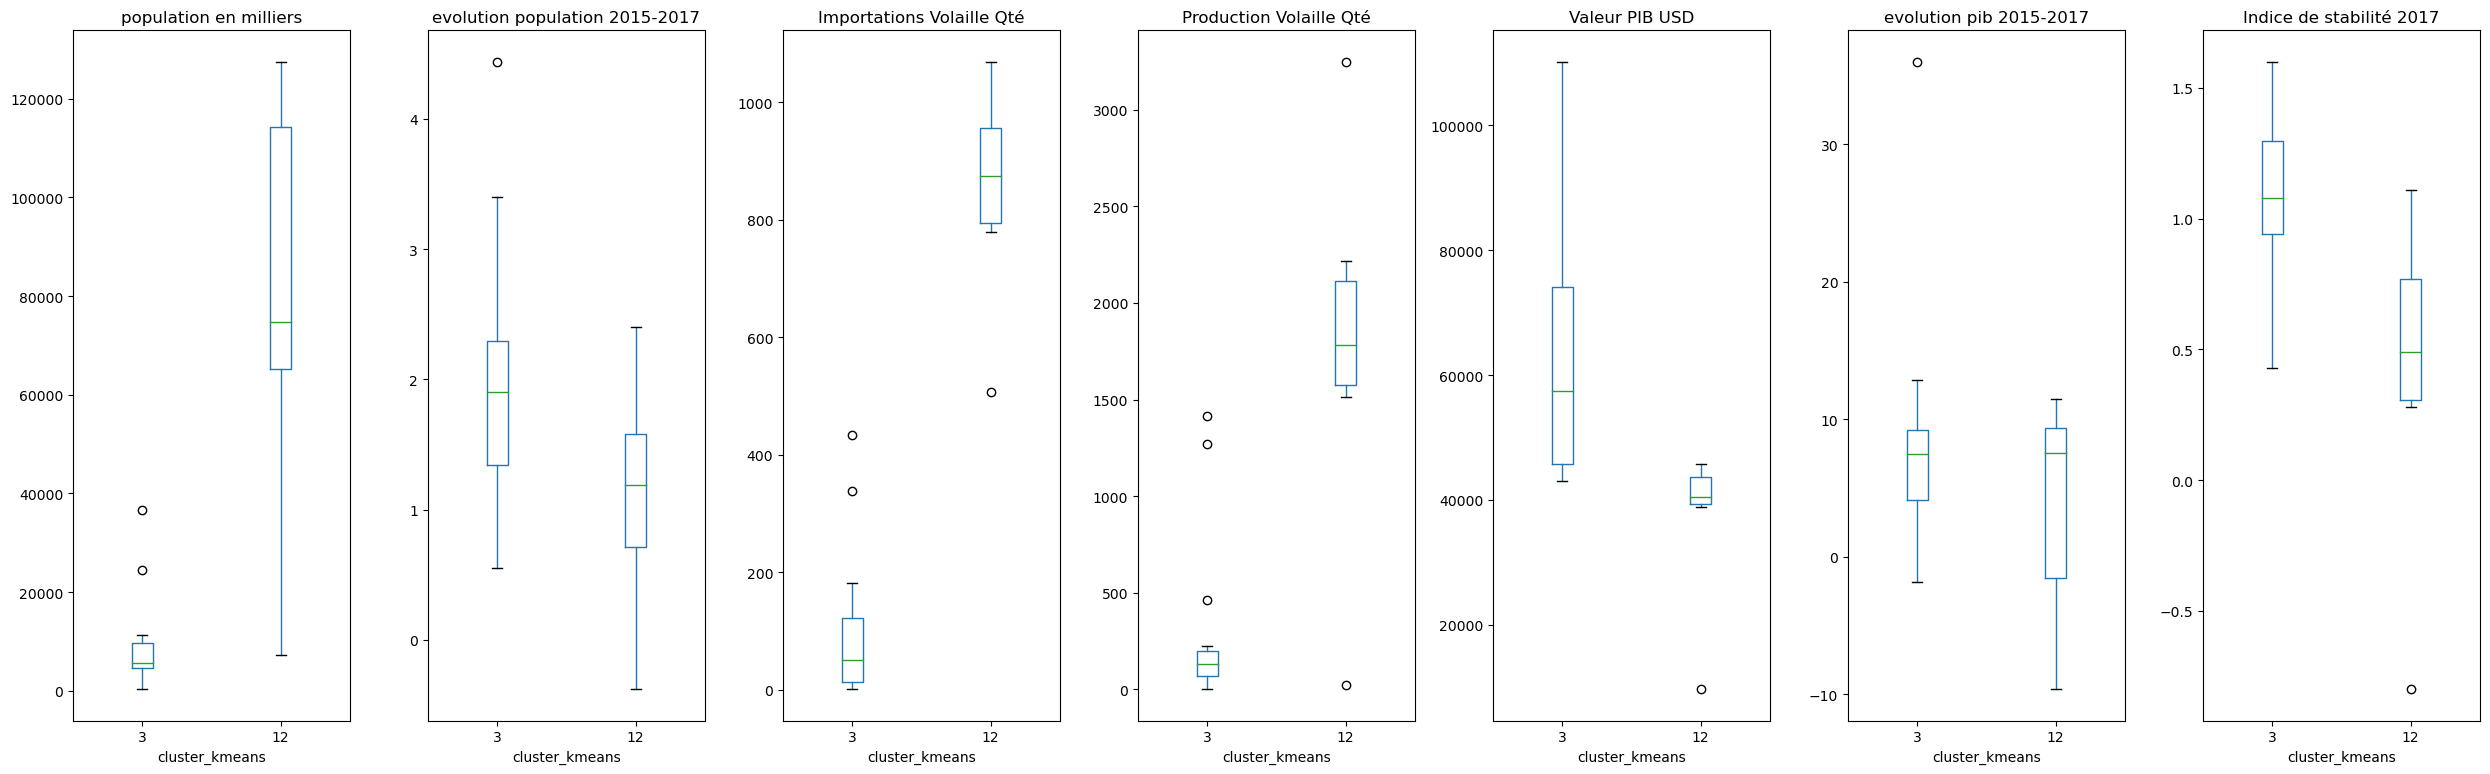

In [32]:
#Boxplot de nos clusters sur l'ensemble des indicateurs

box_plot_kmeans = df_final[df_final['cluster_kmeans'].isin([3,12])]
indicateurs = ['population en milliers','evolution population 2015-2017','Importations Volaille Qté',
               'Production Volaille Qté','Valeur PIB USD','evolution pib 2015-2017',
               'Indice de stabilité 2017']

fig, axes = plt.subplots(nrows=1, ncols=len(indicateurs), figsize=(25, 8))

for ax, indicateur in zip(axes, indicateurs):
    box_plot_kmeans.boxplot(column=indicateur, by='cluster_kmeans', grid=False, ax=ax)
    
plt.suptitle('')
plt.tight_layout()
plt.show()

Cluster 3 semble se composer de pays avec une plus petite population, des importations et une production de volaille plus faibles, un PIB plus bas mais stable, et une croissance économique faible.

Cluster 12 se compose de pays avec une population plus grande, des importations et une production de volaille beaucoup plus élevées, un PIB plus élevé, une croissance économique modérée et une stabilité politique variable.

### 3/ Analyse en Composantes Principales ACP<a id='3'></a>

L'Analyse en Composantes Principales (ACP) est une méthode statistique utilisée principalement pour réduire la dimensionnalité d'un jeu de données tout en conservant le maximum d'information possible.
L'ACP nous permettra ici de synthétiser les informations à analyser en reduisant les demensions.

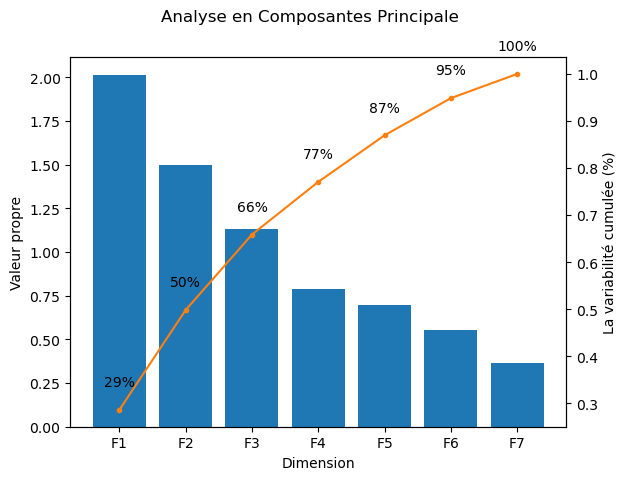

In [112]:
# initialiser et ajuster l'ACP sur les données
pca = PCA()
pca = pca.fit(X_scaled)

# Initialisations des variables
components = np.arange(1, (len(pca.explained_variance_)+1))
components = [f'F{x}' for x in components]

cum_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Représentation du graphiques
fig, ax1 = plt.subplots(figsize=(6.4, 4.8))

ax2 = ax1.twinx()

ax1.bar(components, pca.explained_variance_,)

ax2.plot(components, cum_variance_ratio, color='C1', marker='.')
for x, y in enumerate(cum_variance_ratio):
    ax2.text(x, (y+0.05) , f'{y:.0%}', ha='center')
    
ax1.set_xlabel('Dimension')
ax1.set_ylabel('Valeur propre')
ax2.set_ylabel('La variabilité cumulée (%)')
fig.suptitle('Analyse en Composantes Principale')
plt.show()



Ici les dimensions vont de F1 à F7, cependant on observe que l'on cumule 77% de la variabilité de F1 à F4, ce qui est suffisant pour une réprésentation sur les quatres dimensions.

In [39]:
# Effectue la décomposition
pca = PCA(n_components=4)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

#### Cercle des corrélations<a id='3-1'></a>

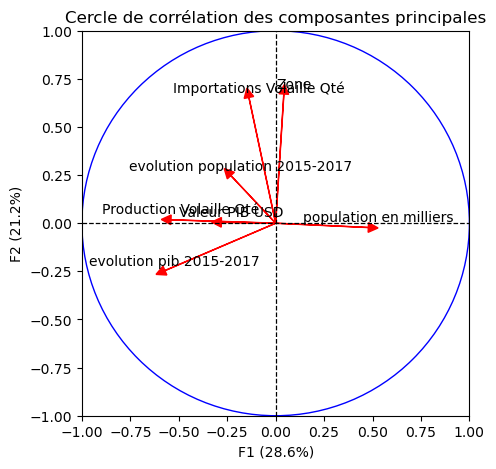

In [41]:
# Sélectionner uniquement les colonnes numériques pour l'ACP
numerical_data = pd.DataFrame(X_scaled)

# Création du cercle de corrélation
fig, ax = plt.subplots(figsize=(5, 5))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

# Afficher les flèches pour les composantes principales
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.arrow(0, 0, comp1, comp2, head_width=0.05, head_length=0.05, color='red')
    
    # Assurez-vous de compléter la ligne ci-dessous correctement
    plt.text(comp1 + 0.05, comp2 + 0.05, df_final.columns[i], color='black', ha='center', va='center')

# Limiter les axes pour une meilleure visibilité
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')

# Titres et labels
plt.xlabel('F1 ({}%)'.format(round(100 * pca.explained_variance_ratio_[0], 1)))
plt.ylabel('F2 ({}%)'.format(round(100 * pca.explained_variance_ratio_[1], 1)))
plt.title('Cercle de corrélation des composantes principales')

# Afficher le graphique
plt.show()



Text(0.5, 1.0, 'Cercle de corrélation des composantes principales')

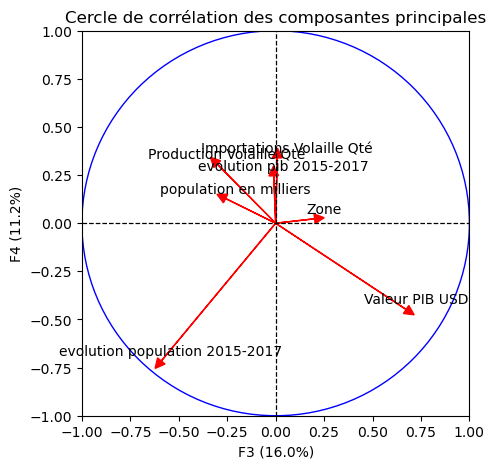

In [42]:
# Sélectionner uniquement les colonnes numériques pour l'ACP
numerical_data = pd.DataFrame(X_scaled)

# Création du cercle de corrélation
fig, ax = plt.subplots(figsize=(5, 5))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

# Afficher les flèches pour les composantes principales
for i, (comp1, comp2) in enumerate(zip(pca.components_[2], pca.components_[3])):
    ax.arrow(0, 0, comp1, comp2, head_width=0.05, head_length=0.05, color='red')
    
    # Assurez-vous de compléter la ligne ci-dessous correctement
    plt.text(comp1 + 0.05, comp2 + 0.05, df_final.columns[i], color='black', ha='center', va='center')

# Limiter les axes pour une meilleure visibilité
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')

plt.xlabel('F3 ({}%)'.format(round(100 * pca.explained_variance_ratio_[2], 1)))
plt.ylabel('F4 ({}%)'.format(round(100 * pca.explained_variance_ratio_[3], 1)))
plt.title('Cercle de corrélation des composantes principales')

Les Axes F1 et F2 représentent un peu moins de 50% de la variance (soit 28,6% pour F1 et 21,2% pour F2). 

Axe F1 semble représenter une dimension liée au développement économique (PIB). 
Axe F2 semble représenter une dimension liée aux importations et à la production de volaille.

Les Axes F3 et F4 représentent un peu plus d'un quart de la variance (soit 16% pour F3 et 11,2% pour F4). 

Axe F3 semble représenter une dimension liée aux importations et à la production économique.
Axe F4 semble moins clairement défini mais pourrait représenter une dimension liée à des changements démographiques (évolution de la population).

Les cercles de corrélation montrent que certaines variables, comme les importations de volaille et le PIB, sont fortement corrélées avec les principaux axes factoriels. Cela signifie qu'elles jouent un rôle important dans la variation des données et sont des indicateurs clés dans l'analyse.
Les importations et la production de volaille sont fortement corrélées avec les axes principaux, indiquant leur importance économique. Le PIB et la population montrent également des corrélations significatives, soulignant leur impact sur les autres variables étudiées. Les évolutions du PIB et de la population semblent avoir des impacts moins directs mais restent pertinentes dans l'analyse. Ces interprétations permettent de mieux comprendre les relations entre les différentes variables et leur importance relative dans l'ensemble des données.


In [103]:
corr_indicateurs_pca = pd.DataFrame(
    np.transpose(pca.components_), index=indicateurs,
    columns=['F1', 'F2', 'F3', 'F4'])

(corr_indicateurs_pca
 .style.background_gradient(axis='rows', cmap='RdYlBu').format('{:.2f}'))


,F1,F2,F3,F4
population en milliers,0.04,0.67,0.20,0.02
evolution population 2015-2017,0.48,-0.02,-0.26,0.13
Importations Volaille Qté,-0.23,0.25,-0.59,-0.72
Production Volaille Qté,-0.14,0.65,0.01,0.34
Valeur PIB USD,-0.54,0.02,-0.30,0.31
evolution pib 2015-2017,-0.28,0.00,0.67,-0.45
Indice de stabilité 2017,-0.57,-0.25,-0.01,0.25


Nous choisissons ici de projetté nos individus sur les composantes suivantes :

F1 qui est positivement corrélé à des éléments démographique et notamment à l'évolution de la population, et négativement à la valeur PIB et à l'indice de stabilité.

F3 qui est trés négativement corrélé à l'importation, et positivement corrélé l'evolution du PIB.

La composante F2 est moins interessante car elle est fortement corrélé à la production de volaille et dans une moins mesure à l'importation, or nous souhaitons des pays candidats à l'augmentation de leurs importations.
La composante F4 n'est pas retenue car sa variance est assez faible et peu impactante(11,4%).

#### Projection des individus<a id='3-2'></a>

Après avoir créé de nouvelles variables, nous pouvons projeter les pays sur des plans définis par ces dernières. Nous allons créer une autre fonction qui nous permettra de sélectionner les dimensions à utiliser pour composer le plan que nous souhaitons représenter.

Nous nous interessons au pays des clusters 3 et 12 qui sont situés en bas à gauche de notre projection. F1 étant négativement corrélé à la valeur du PIB et à l'indice de stabilité politique, c'est à dire que plus la valeur de ces derniers augmentent, plus mes points seront projettés en bas à gauche. Ces pays disposent d'une bonnes valeurs du PIB ainsi que d'une stabilité politique rassurante.

F3 ayant une corrélation négative sur les importations, ainsi plus les pays auront une valeur faible, plus ils importeront de la volaille (leurs besoins d'importations sera important).

Notre sélection de pays candidats à un nouveau marché cible peut se faire dans le cluster 12 situé en bas à gauche de notre projection.

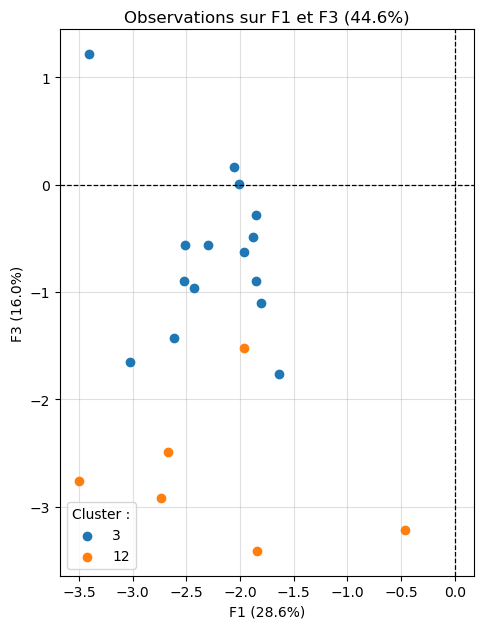

In [132]:
 # Initialise les variables
cum_variance_ratio = (pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[2])
df = pd.DataFrame(X_pca)
df['cluster']=df_final['cluster_kmeans']
df=df.loc[df['cluster'].isin([3,12])]
markers = ['p', '+', '*', 'x']

fig, ax = plt.subplots(figsize=(6.4, 6.4))

# Personnalise le graphique
ax.set_aspect('equal')
ax.grid(alpha=0.4)
ax.set_axisbelow(True)


# Trace les lignes en pointillés pour x = 0  et y = 0
ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')

ax.scatter(df.loc[df['cluster'] == 3, 0],df.loc[df['cluster'] == 3, 2], label=3)
ax.scatter(df.loc[df['cluster'] == 12, 0],df.loc[df['cluster'] == 12, 2], label=12)

# Ajoute les titre (axes et figure)
ax.set_xlabel(f'F{1} ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'F{3} ({pca.explained_variance_ratio_[2]:.1%})')

ax.set_title(f'Observations sur F{1} et F{3}'f' ({cum_variance_ratio:.1%})')

fig.tight_layout()

plt.legend(title='Cluster :')
 
plt.show()

In [262]:
#Le cluster avec les pays potentiellement interessants
df_final.loc[(df_final['cluster_kmeans'] == 12) ]
#df_final.loc[df_final['cluster_kmeans'].isin([12, 3])]


,Zone,population en milliers,evolution population 2015-2017,Importations Volaille Qté,Production Volaille Qté,Valeur PIB USD,evolution pib 2015-2017,Indice de stabilité 2017,cluster_m,cluster_kmeans
4,Allemagne,82658.409,1.06,842.0,1514.0,44670.222282,9.24,0.59,5,12
31,Chine - RAS de Hong-Kong,7306.322,1.67,907.0,24.0,45737.483211,9.39,0.83,5,12
54,France,64842.509,0.60,506.0,1750.0,40458.149878,5.88,0.28,4,12
78,Japon,127502.725,-0.38,1069.0,2215.0,38928.952604,11.45,1.11,5,12
100,Mexique,124777.324,2.40,972.0,3249.0,9693.330262,-4.01,-0.80,6,12
128,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,1.32,779.0,1814.0,40568.470503,-9.63,0.39,5,12


Voici ci-dessus la liste des pays qui pourraient potentiellement etre de nouveau marché pour notre entreprise.